#**On-Field Analytics**


##Exploring Pythagorean Expectation in Soccer Data for Match Win Prediction

The procedure is as follows:-  
(1)Organise the data, stripping away columns which are not needed

(2)Calculate the win percentage 

(3)Get the Pythagorean Expectation from the formula.

(4)Plot a regression between Pythagorean Expectation and win percentage.

(5)Observe the statistical summary

###Data pre-processing and re-organisation



In [ ]:
# Load the packages

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the data. 
# My data covers the 2018/19 season since that is the last data available (SOURCE:- https://datahub.io/sports-data/english-premier-league#resource-season-1819)

Eng18 = pd.read_csv('https://raw.githubusercontent.com/Dubeman/Python-project-CSV-files/main/Engsoccer2018-19.csv')
print(Eng18.columns.tolist())

['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']


In [ ]:
#We can see what our dataframe looks like 

Eng18


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,E0,10/08/2018,Man United,Leicester,2,1,H
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A
...,...,...,...,...,...,...,...
375,E0,12/05/2019,Liverpool,Wolves,2,0,H
376,E0,12/05/2019,Man United,Cardiff,0,2,A
377,E0,12/05/2019,Southampton,Huddersfield,1,1,D
378,E0,12/05/2019,Tottenham,Everton,2,2,D


In [ ]:
# our data is in the form of game results. We first identify whether the result was a win for the home team (H),
# the away team (A) or a draw (D). We also create the counting variable.

Eng18['hwinvalue']=np.where(Eng18['FTR']=='H',1,np.where(Eng18['FTR']=='D',.5,0))
Eng18['awinvalue']=np.where(Eng18['FTR']=='A',1,np.where(Eng18['FTR']=='D',.5,0))
Eng18['count']=1

In [ ]:
# we have to create separate dfs to calculate home team and away team performance.
# Here is the home team df, including only the variables we need.

Enghome = Eng18.groupby(['HomeTeam','Div'])['count','hwinvalue', 'FTHG','FTAG'].sum().reset_index()
Enghome = Enghome.rename(columns={'HomeTeam':'team','count':'Ph','FTHG':'FTHGh','FTAG':'FTAGh'})
Enghome

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,team,Div,Ph,hwinvalue,FTHGh,FTAGh
0,Arsenal,E0,19,15.5,42,16
1,Bournemouth,E0,19,10.5,30,25
2,Brighton,E0,19,8.5,19,28
3,Burnley,E0,19,8.0,24,32
4,Cardiff,E0,19,7.0,21,38
5,Chelsea,E0,19,15.0,39,12
6,Crystal Palace,E0,19,7.5,19,23
7,Everton,E0,19,12.0,30,21
8,Fulham,E0,19,7.5,22,36
9,Huddersfield,E0,19,3.5,10,31


In [ ]:
# Now we create the same df for the away team results.

Engaway = Eng18.groupby('AwayTeam')['count','awinvalue', 'FTHG','FTAG'].sum().reset_index()
Engaway = Engaway.rename(columns={'AwayTeam':'team','count':'Pa','FTHG':'FTHGa','FTAG':'FTAGa'})
Engaway

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,team,Pa,awinvalue,FTHGa,FTAGa
0,Arsenal,19,9.0,35,31
1,Bournemouth,19,5.5,45,26
2,Brighton,19,5.0,32,16
3,Burnley,19,6.5,36,21
4,Cardiff,19,5.0,31,13
5,Chelsea,19,10.5,27,24
6,Crystal Palace,19,10.0,30,32
7,Everton,19,7.5,25,24
8,Fulham,19,2.0,45,12
9,Huddersfield,19,3.0,45,12


In [ ]:
# Merge the home team and away team results

Eng18 = pd.merge(Enghome, Engaway, on = ['team'])
Eng18

,team,Div,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa
0,Arsenal,E0,19,15.5,42,16,19,9.0,35,31
1,Bournemouth,E0,19,10.5,30,25,19,5.5,45,26
2,Brighton,E0,19,8.5,19,28,19,5.0,32,16
3,Burnley,E0,19,8.0,24,32,19,6.5,36,21
4,Cardiff,E0,19,7.0,21,38,19,5.0,31,13
5,Chelsea,E0,19,15.0,39,12,19,10.5,27,24
6,Crystal Palace,E0,19,7.5,19,23,19,10.0,30,32
7,Everton,E0,19,12.0,30,21,19,7.5,25,24
8,Fulham,E0,19,7.5,22,36,19,2.0,45,12
9,Huddersfield,E0,19,3.5,10,31,19,3.0,45,12


In [ ]:
# Sum the results by home and away measures to get the team overall performance for the season

Eng18['W'] = Eng18['hwinvalue']+Eng18['awinvalue']
Eng18['G'] = Eng18['Ph']+Eng18['Pa']
Eng18['GF'] = Eng18['FTHGh']+Eng18['FTAGa']
Eng18['GA'] = Eng18['FTAGh']+Eng18['FTHGa']
Eng18

,team,Div,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa,W,G,GF,GA
0,Arsenal,E0,19,15.5,42,16,19,9.0,35,31,24.5,38,73,51
1,Bournemouth,E0,19,10.5,30,25,19,5.5,45,26,16.0,38,56,70
2,Brighton,E0,19,8.5,19,28,19,5.0,32,16,13.5,38,35,60
3,Burnley,E0,19,8.0,24,32,19,6.5,36,21,14.5,38,45,68
4,Cardiff,E0,19,7.0,21,38,19,5.0,31,13,12.0,38,34,69
5,Chelsea,E0,19,15.0,39,12,19,10.5,27,24,25.5,38,63,39
6,Crystal Palace,E0,19,7.5,19,23,19,10.0,30,32,17.5,38,51,53
7,Everton,E0,19,12.0,30,21,19,7.5,25,24,19.5,38,54,46
8,Fulham,E0,19,7.5,22,36,19,2.0,45,12,9.5,38,34,81
9,Huddersfield,E0,19,3.5,10,31,19,3.0,45,12,6.5,38,22,76


###Pythagorean Expectation

In [ ]:
 #Create the win percentage(w) and Pythagorean Expectation(pyth)

Eng18['wpc'] = Eng18['W']/Eng18['G']
Eng18['pyth'] = Eng18['GF']**2/(Eng18['GF']**2 + Eng18['GA']**2)
Eng18

,team,Div,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa,W,G,GF,GA,wpc,pyth
0,Arsenal,E0,19,15.5,42,16,19,9.0,35,31,24.5,38,73,51,0.644737,0.672005
1,Bournemouth,E0,19,10.5,30,25,19,5.5,45,26,16.0,38,56,70,0.421053,0.390244
2,Brighton,E0,19,8.5,19,28,19,5.0,32,16,13.5,38,35,60,0.355263,0.253886
3,Burnley,E0,19,8.0,24,32,19,6.5,36,21,14.5,38,45,68,0.381579,0.304557
4,Cardiff,E0,19,7.0,21,38,19,5.0,31,13,12.0,38,34,69,0.315789,0.195369
5,Chelsea,E0,19,15.0,39,12,19,10.5,27,24,25.5,38,63,39,0.671053,0.722951
6,Crystal Palace,E0,19,7.5,19,23,19,10.0,30,32,17.5,38,51,53,0.460526,0.480776
7,Everton,E0,19,12.0,30,21,19,7.5,25,24,19.5,38,54,46,0.513158,0.579491
8,Fulham,E0,19,7.5,22,36,19,2.0,45,12,9.5,38,34,81,0.250000,0.149799
9,Huddersfield,E0,19,3.5,10,31,19,3.0,45,12,6.5,38,22,76,0.171053,0.077316


###Plotting Win percentage vs Pythagorean Expectation

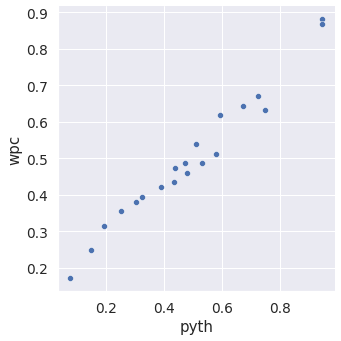

In [ ]:
# Plot the data
# This illustrates nicely the close correlation between win percentage and the Pythagorean Expectation.


sns.relplot(x="pyth", y="wpc", data =Eng18)


###Regression 

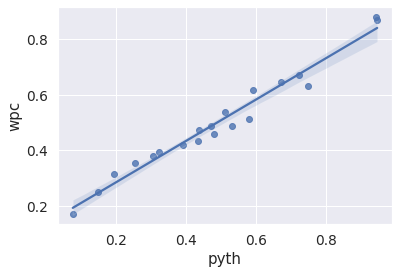

In [ ]:
sns.regplot(x="pyth", y="wpc", data =Eng18)#statsmodel for a regression

###Regressional Analysis

In [ ]:
# Using the stats model summary function to get the summary of our regression
pyth_lm = smf.ols(formula = 'wpc ~ pyth', data=Eng18).fit()
pyth_lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     582.1
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           3.70e-15
Time:                        16:41:42   Log-Likelihood:                 41.291
No. Observations:                  20   AIC:                            -78.58
Df Residuals:                      18   BIC:                            -76.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1354      0.017      8.080      0.000       0.100       0.171
pyth           0.7472      0.031     24.127      0.000       0.682       0.812
==============================================================================
Omnibus:                        1.750   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.417   Jarque-Bera (JB):                1.453
Skew:                          -0.527   Prob(JB):                        0.484
Kurtosis:                       2.205   Cond. No.                         5.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###**Conclusion**

Looking at the stats such as the t-statistic and the R squared value we can observe that Pythagorean expectation captures a very large fraction of the given observables.

Therefore, we can relate win percentage to Pythagorean expectation and show that there is a very close fit between the two variables, which further goes to show the capability of the PE for predictive analysis.

#**Off-Field Analytics**

##Player salary Prediction Model in NBA
 
 This will be done in 3 steps:-  
(1)Discover which statistics are the best predictors of an NBA player’s salary.

(2)Use a machine learning model to predict NBA salaries.

(3)Determine which players have been overvalued and undervalued according to their given vs. predicted salary.






###Reorganisation and Normalisation of Data

In [ ]:
import matplotlib.pyplot as plt#importing libs
import seaborn as sns
import pandas as pd
import numpy as np
from pandas import read_csv
import statsmodels.formula.api as smf

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 75)

In [ ]:
nbaData="https://raw.githubusercontent.com/joshrosson/NBASalaryPredictions/master/NBAdata.csv"
temp=pd.read_csv(nbaData)
stats=temp.copy()
stats=stats.drop("#", axis=1)
stats=stats.drop("blank2", axis=1)
stats=stats.drop("blanl", axis=1)

In [ ]:
temp

,#,Season Start,Player Name,Player Salary in $,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,11999.0,1995.0,A.C. Green,6473000,SF,31.0,PHO,82.0,52.0,2687.0,14.2,0.596,0.206,0.556,8.3,20.4,14.3,6.5,1.0,0.8,12.9,14.2,NaN,4.6,2.1,6.7,0.120,NaN,0.6,0.2,0.7,1.9,311.0,617.0,0.504,43.0,127.0,0.339,268.0,490.0,0.547,0.539,251.0,343.0,0.732,194.0,475.0,669.0,127.0,55.0,31.0,114.0,146.0,916.0
1,12107.0,1995.0,Aaron McKie,845000,SG,22.0,POR,45.0,20.0,827.0,13.3,0.500,0.107,0.280,4.6,13.5,8.8,15.9,2.2,1.4,11.7,17.0,NaN,0.8,1.2,2.0,0.115,NaN,-1.2,1.3,0.1,0.4,116.0,261.0,0.444,11.0,28.0,0.393,105.0,233.0,0.451,0.466,50.0,73.0,0.685,35.0,94.0,129.0,89.0,36.0,16.0,39.0,97.0,293.0
2,12232.0,1995.0,Aaron Swinson,NaN,SF,24.0,PHO,9.0,0.0,51.0,11.7,0.594,0.000,0.278,6.7,11.3,9.0,9.0,1.0,0.0,19.8,21.4,NaN,0.0,0.0,0.0,0.039,NaN,-2.9,-2.9,-5.8,0.0,10.0,18.0,0.556,0.0,0.0,NaN,10.0,18.0,0.556,0.556,4.0,5.0,0.800,3.0,5.0,8.0,3.0,1.0,0.0,5.0,8.0,24.0
3,12268.0,1995.0,Aaron Williams,NaN,PF,23.0,MIL,15.0,0.0,72.0,7.0,0.410,0.042,0.500,8.1,24.1,15.9,0.0,1.4,6.2,19.3,22.3,NaN,-0.2,0.1,-0.1,-0.067,NaN,-11.8,-2.9,-14.7,-0.2,8.0,24.0,0.333,0.0,1.0,0.000,8.0,23.0,0.348,0.333,8.0,12.0,0.667,5.0,14.0,19.0,0.0,2.0,6.0,7.0,14.0,24.0
4,11953.0,1995.0,Acie Earl,1040000,C,24.0,BOS,30.0,3.0,208.0,6.6,0.409,0.000,0.426,10.4,14.6,12.5,1.4,1.5,2.6,14.8,19.7,NaN,-0.4,0.2,-0.2,-0.038,NaN,-6.8,-1.9,-8.7,-0.4,26.0,68.0,0.382,0.0,0.0,NaN,26.0,68.0,0.382,0.382,14.0,29.0,0.483,19.0,26.0,45.0,2.0,6.0,8.0,14.0,39.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12825,24261.0,2017.0,Yogi Ferrell,1312611,PG,23.0,DAL,36.0,29.0,1046.0,14.1,0.541,0.432,0.212,1.7,9.7,5.5,24.1,2.0,0.6,12.9,19.5,NaN,1.0,0.9,2.0,0.090,NaN,0.5,-0.3,0.2,0.6,142.0,345.0,0.412,60.0,149.0,0.403,82.0,196.0,0.418,0.499,64.0,73.0,0.877,16.0,83.0,99.0,155.0,40.0,7.0,56.0,79.0,408.0
12826,24408.0,2017.0,Zach LaVine,3202217,SG,21.0,MIN,47.0,47.0,1749.0,14.6,0.576,0.437,0.197,1.2,9.5,5.3,12.6,1.2,0.5,9.9,21.7,NaN,2.5,0.4,3.0,0.082,NaN,2.1,-2.4,-0.3,0.8,326.0,710.0,0.459,120.0,310.0,0.387,206.0,400.0,0.515,0.544,117.0,140.0,0.836,18.0,141.0,159.0,139.0,41.0,10.0,85.0,104.0,889.0
12827,24550.0,2017.0,Zach Randolph,12307692,PF,35.0,MEM,73.0,5.0,1786.0,18.5,0.490,0.098,0.200,11.3,27.4,19.1,13.5,1.1,0.5,8.6,29.2,NaN,0.8,2.4,3.2,0.086,NaN,-1.4,-0.7,-2.1,0.0,433.0,964.0,0.449,21.0,94.0,0.223,412.0,870.0,0.474,0.460,141.0,193.0,0.731,182.0,416.0,598.0,122.0,38.0,10.0,99.0,136.0,1028.0
12828,24515.0,2017.0,Zaza Pachulia,3477600,C,32.0,GSW,70.0,70.0,1268.0,16.1,0.588,0.007,0.410,12.9,22.0,17.7,13.6,2.2,2.0,19.5,15.3,NaN,2.2,2.5,4.7,0.177,NaN,-0.3,3.0,2.7,1.5,164.0,307.0,0.534,0.0,2.0,0.000,164.0,305.0,0.538,0.534,98.0,126.0,0.778,140.0,270.0,410.0,132.0,59.0,33.0,88.0,166.0,426.0


In [ ]:
stats.rename(columns={"Season Start": "Season"}, inplace=True)#Renaming certain columns
stats.rename(columns={"Tm": "Team"}, inplace=True)
stats.rename(columns={"Player Name": "Name"}, inplace=True)
stats.rename(columns={"Player Salary in $": "Salary"}, inplace=True)
stats.rename(columns={"G": "GP"}, inplace=True)

In [ ]:
#mapping numeric values onto positions because otherwise we wont be able to run a regression
mapping = {'PG': 1, 'SG': 2, 'SF': 3, 'PF': 4, 'C':5}
stats['Pos'] = stats['Pos'].map(mapping)
#ratio of Games started to games played
stats["GS/GP"]=stats["GS"]/stats["GP"]

#removing last row from dataset because it's null
stats=stats[:-1]

In [ ]:
#stats should be a on a per-game basis instead of totals to eliminate the effect of games played
stats["MPG"]=stats["MP"]/stats["GP"]
stats["ORPG"]=stats["ORB"]/stats["GP"]
stats["DRPG"]=stats["DRB"]/stats["GP"]
stats["RPG"]=stats["TRB"]/stats["GP"]
stats["APG"]=stats["AST"]/stats["GP"]
stats["SPG"]=stats["STL"]/stats["GP"]
stats["BPG"]=stats["BLK"]/stats["GP"]
stats["TPG"]=stats["TOV"]/stats["GP"]
stats["PFPG"]=stats["PF"]/stats["GP"]
stats["PPG"]=stats["PTS"]/stats["GP"]
stats["FGPG"]=stats["FG"]/stats["GP"]
stats["FGAPG"]=stats["FGA"]/stats["GP"]
stats["3PPG"]=stats["3P"]/stats["GP"]
stats["3PAPG"]=stats["3PA"]/stats["GP"]
stats["2PPG"]=stats["2P"]/stats["GP"]
stats["2PAPG"]=stats["2PA"]/stats["GP"]
stats["FTPG"]=stats["FT"]/stats["GP"]
stats["FTAPG"]=stats["FTA"]/stats["GP"]

#drop all total columns
drop_column = ['MP', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA']
stats.drop(drop_column, axis=1, inplace = True)

In [ ]:
#a group of the regular stats which can act as predictors of salary
regular=['% of Cap','ORPG', 'DRPG', 'RPG', 'APG', 'SPG', 'BPG', 'TPG', 'PFPG', 'PPG', 'FGPG', 'FGAPG', '3PPG', '3PAPG', '2PPG', '2PAPG', 'FTPG', 'FTAPG']


#change salary from object to float
stats["Salary"] = stats.Salary.astype(float)

#removed stars from some players names
stats['Name'] = stats['Name'].map(lambda x: x.rstrip('*'))

In [ ]:
#dataset had total stats for a player if he was on two teams in one season, but we wanted to look at data on specific teams, too, so the "TOT" value wouldn't work
stats=stats[~stats["Team"].str.contains("TOT", na=False)]

#players don't qualify if they've played in less than or equal to 15 games on a team
stats=stats[stats['GP']>15]

#if no salary is in the dataset, we can't use that row
stats=stats.dropna(subset = ['Salary'])


#if a player still had a NaN at this point, it meant they didn't take any shots that season, so give them values of 0s for the percentages columns
empty=['TS%','3PAr','FTr','TOV%','FG%','3P%','2P%','eFG%','FT%']
for i in empty:
    stats[i].fillna(0, inplace=True)

In [ ]:
#teams have changed names and locations over the years, this is keeping the franchises consistent
stats["Team"].replace("CHH", "NOP", inplace=True)
stats["Team"].replace("NOH", "NOP", inplace=True)
stats["Team"].replace("NOK", "NOP", inplace=True)
stats["Team"].replace("NJN", "BRK", inplace=True)
stats["Team"].replace("WSB", "WAS", inplace=True)
stats["Team"].replace("SEA", "OKC", inplace=True)
stats["Team"].replace("VAN", "MEM", inplace=True)
stats["Team"].replace("CHA", "CHO", inplace=True)
len(stats["Team"].unique())
#now only thirty teams in the league

30

###Some perspective from a Histogram 





[]

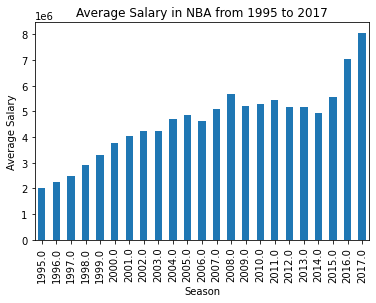

In [ ]:
#salary cap for all years from 1995 to 2017
from pandas import *
my_dic = pd.read_csv('https://raw.githubusercontent.com/Dubeman/Python-project-CSV-files/main/salarycap.csv', index_col=0).to_dict()
cap=my_dic['Salary Cap']
#to normalize salaries, make them as a percentage of the salary cap in that year
stats['Cap'] = stats['Season'].map(cap)
stats['% of Cap']=(stats['Salary']/stats['Cap'])*100
#DATA EXPLORATION
#Get mean of average NBA Salary from each year to show that it doesn't make sense to look at absolute salaries
sal=stats.groupby('Season')['Salary'].mean()
var=sal.plot.bar(x='Season', y='Salary')
var.set_ylabel("Average Salary")
var.set_title("Average Salary in NBA from 1995 to 2017")
var.plot()

###Sifting out the major salary predictors

####Heat Map Analysis with Seaborn

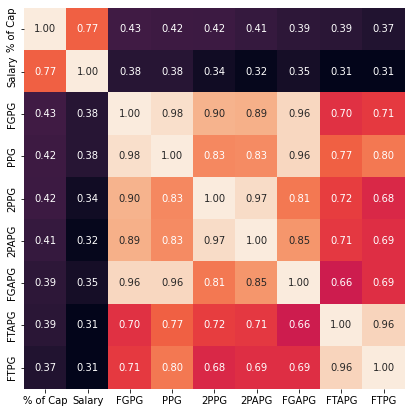

In [ ]:
#function that creates heatmaps for the 8 variables that are most strongly correlated with % of Cap for each of the data subsets

def heatMap(df, k):
    corrmat = df.corr(method='pearson', min_periods=1)
    r_square = corrmat ** 2
    ## Top K-1 correlated variables
    cols = r_square.nlargest(k, '% of Cap')['% of Cap'].index
    cm = df[cols].corr()
    cm_square = cm ** 2
    f, ax = plt.subplots(figsize=(7, 7))
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm_square, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()
heatMap(stats, 9)

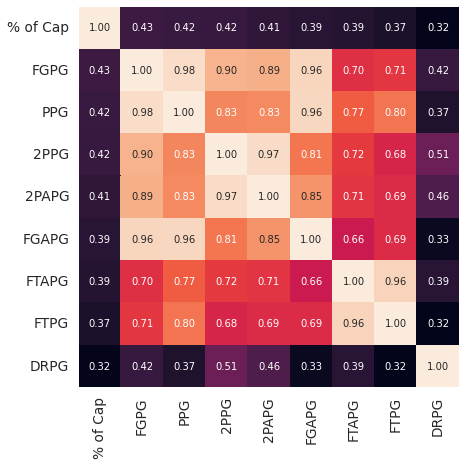

In [ ]:
regular_stats=stats[regular] #Heat Map of the regular stats we defined before without the salary
heatMap(regular_stats, 9)

####Split into train and test sets


>Lets choose 4 out of the most important variables and perform a prediction  



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


In [ ]:
#Creating an annotated dataset
y=stats[['% of Cap']]#target array
regularDF=regular_stats[[ 'PPG','2PAPG','FTAPG','DRPG']]#Our chosen regressors
linreg = LinearRegression()

In [ ]:
#splitting in to train and test sets
x_train, x_test, y_train, y_test=train_test_split(regularDF, y, test_size=0.2, random_state=123)
linreg.fit(x_train, y_train)
predictions=linreg.predict(x_test)
result = linreg.score(x_test, y_test)#Accuracy
print("Accuracy: %.3f%%" % (result*100.0))



Accuracy: 44.908%


####K-fold Cross Validation

In [ ]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)# 10 fold cross validation
results = cross_val_score(linreg, regularDF, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 47.132% (3.165%)


####Regression Plot

In [ ]:
#get RMSE and R^2 values
predict = cross_val_predict(linreg, regularDF, y, cv=6)
rmse = np.sqrt(mean_squared_error(predict, y))
score = metrics.r2_score(y, predict)
print ('Root Mean Squared Error is :', rmse)
print ('R sq is :', score)


Root Mean Squared Error is : 6.457833389603529
R sq is : 0.4656139096368648


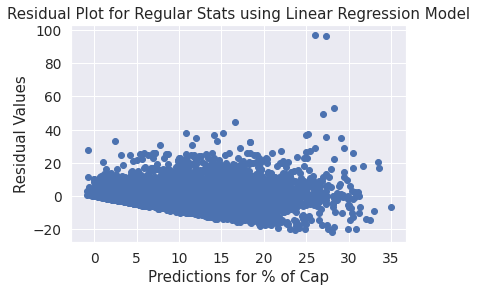

In [ ]:
#cross validate model and store the predicted values in a variables
predict = cross_val_predict(linreg, regularDF, y, cv=6)
#create residual plot
residuals = y - predict #actual values - predicted values (to get our prediction error)
plt.scatter(predict, residuals)
plt.xlabel('Predictions for % of Cap')
plt.ylabel('Residual Values')
plt.title('Residual Plot for Regular Stats using Linear Regression Model')
plt.show()

In [ ]:
stats['Predicted % of Cap']=predict
stats['Residuals']=residuals
stats['Resid %']=(stats['Residuals']/stats['% of Cap']*100)

In [ ]:
stats_new=stats
stats_new=stats_new[['Season', 'Name', 'Age', 'Team', 'PER', '% of Cap', 'Predicted % of Cap', 'Residuals']]
stats_new

,Season,Name,Age,Team,PER,% of Cap,Predicted % of Cap,Residuals
0,1995.0,A.C. Green,31.0,PHO,14.2,28.143478,14.485431,13.658047
1,1995.0,Aaron McKie,22.0,POR,13.3,3.673913,6.111605,-2.437692
4,1995.0,Acie Earl,24.0,BOS,6.6,4.521739,1.616971,2.904768
5,1995.0,Adam Keefe,24.0,UTA,15.1,7.173913,6.679800,0.494113
11,1995.0,Alonzo Mourning,24.0,NOP,20.1,19.826087,24.954597,-5.128510
...,...,...,...,...,...,...,...,...
12822,2017.0,Wilson Chandler,29.0,DEN,14.9,12.126844,16.097035,-3.970191
12825,2017.0,Yogi Ferrell,23.0,DAL,14.1,1.324625,9.403144,-8.078519
12826,2017.0,Zach LaVine,21.0,MIN,14.6,3.231527,15.250410,-12.018883
12827,2017.0,Zach Randolph,35.0,MEM,18.5,12.420345,16.433474,-4.013129





###Conclusion

Now we were able to build a machine learning linear regression model to predict the salaries on the basis of fraction of the total salary cap. But the accuracy of our classification is only around 45%. The possible reasons for this happening could be :
(1)Multicollinearity among variables chosen.
(2)Some players are overvalued,based on their history, popularity and sponsorship which can fetch them very high pays, whereas the more up and coming players are paid lesser due to their inexperience, thus leading to non-uniformity in the data.

In [ ]:
#the top25 most undervalued players
stats_new = stats_new.sort_values('Residuals')
over_valued = stats_new[:25]
over_valued

,Season,Name,Age,Team,PER,% of Cap,Predicted % of Cap,Residuals
12551,2017.0,Karl-Anthony Towns,21.0,MIN,26.0,6.273743,28.032464,-21.758721
4406,2003.0,Karl Malone,39.0,UTA,21.7,3.421533,23.660177,-20.238644
3517,2001.0,Paul Pierce,23.0,BOS,22.3,4.826520,24.796634,-19.970114
6122,2006.0,LeBron James,21.0,CLE,28.1,10.968458,30.816153,-19.847695
5217,2004.0,Zach Randolph,22.0,POR,19.6,3.428931,23.118497,-19.689566
8999,2011.0,Kevin Love,22.0,MIN,24.3,7.941736,27.605995,-19.664259
8385,2010.0,Kevin Durant,21.0,OKC,26.2,10.429438,29.877678,-19.448240
3987,2002.0,Michael Jordan,38.0,WAS,20.7,2.557672,21.658672,-19.101000
3278,2001.0,Dirk Nowitzki,22.0,DAL,22.8,5.076694,24.163166,-19.086472
8704,2011.0,Blake Griffin,21.0,LAC,21.9,9.873682,28.322918,-18.449236


In [ ]:
#top 25 most overvalued plays
under_valued = stats_new[-25:]
under_valued

,Season,Name,Age,Team,PER,% of Cap,Predicted % of Cap,Residuals
3416,2001.0,Kevin Garnett,24.0,MIN,23.9,52.705882,25.469724,27.236158
2410,1999.0,Kevin Garnett,22.0,MIN,22.4,49.430294,22.029292,27.401002
11097,2015.0,Cameron Bairstow,24.0,CHI,2.1,27.142857,-0.766960,27.909817
861,1996.0,Reggie Miller,30.0,IND,20.1,46.176579,17.182439,28.994140
4080,2002.0,Shaquille O'Neal,29.0,LAL,29.7,58.532018,29.433868,29.098150
2905,2000.0,Kevin Garnett,23.0,MIN,23.6,55.239437,26.029043,29.210394
5237,2005.0,Allan Houston,33.0,NYK,12.5,38.636364,7.744180,30.892183
3571,2001.0,Scottie Pippen,35.0,POR,15.3,42.549562,11.471871,31.077692
3923,2002.0,Juwan Howard,28.0,DEN,17.1,51.215515,18.375407,32.840108
3667,2002.0,Alonzo Mourning,31.0,MIA,18.9,51.227434,18.344593,32.882841


###Is there a relation between salary and performance?

In [ ]:

#now grouping by team to determine which teams best value their players, and if there's an effect on how much they win?
teams=stats_new.groupby('Team').mean()
teams['Resid %']=(teams['Residuals']/teams['% of Cap']) *100
teams=teams.drop("Season", axis=1)
#adding in wins per team over 1995-2017
x=pd.read_csv('https://raw.githubusercontent.com/joshrosson/NBASalaryPredictions/master/nbaTeamWins.csv') #data for team wins per season
wins=x[['Team', 'Average Wins']]
wins.set_index('Team')
lis=wins['Average Wins'].tolist()
teams['Avg Wins']=lis
teams

,Age,PER,% of Cap,Predicted % of Cap,Residuals,Resid %,Avg Wins
Team,,,,,,,
ATL,26.753676,13.634559,8.691794,9.040563,-0.348769,-4.012618,38.217391
BOS,26.334586,13.404887,8.808181,8.801429,0.006753,0.076664,40.869565
BRK,27.003745,13.218352,9.258158,9.134652,0.123506,1.334025,33.826087
CHI,27.022472,13.411610,9.469930,9.077095,0.392835,4.148237,40.826087
CHO,26.505263,12.938947,6.883444,8.366333,-1.482889,-21.542836,31.857143
CLE,26.393502,13.250181,8.866430,9.154724,-0.288294,-3.251523,40.130435
DAL,27.907749,14.198893,9.711257,8.814293,0.896964,9.236333,44.521739
DEN,26.533333,13.967451,8.251178,9.347896,-1.096718,-13.291660,37.739130
DET,27.228137,13.817871,8.482736,8.557897,-0.075161,-0.886048,41.521739


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


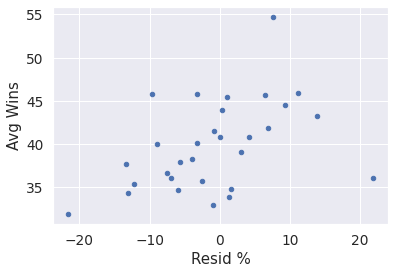

In [ ]:
scat=teams.plot.scatter('Resid %', 'Avg Wins') #a scatter plot between residual and avg wins

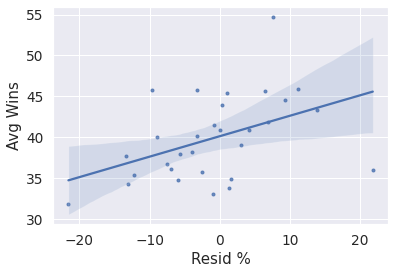

In [ ]:
sns.regplot(x='Resid %', y='Avg Wins', data= teams,  marker='.')# again using the statsmodel module

###**Conclusion** : the teams that overvalued its players generally had more success than the teams that undervalued them.
